# Example Two - B-H Procedure with Large n

## Import Packages

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [4]:
import warnings
warnings.filterwarnings('ignore')

### This exercise will follow an example found at:
https://www.stat.berkeley.edu/~mgoldman/Section0402.pdf

## Simulate Data
Data simulated from two distributions:
* 900 realizations from N(0,1)
* 100 realizations from N(3,1)

In [7]:
# simulate two arrays of test statistics
# first is from standard normal
np.random.seed(1740)
true_null = np.random.normal(loc=0.0, scale=1.0, size=900)
# second is from N(3,1)
np.random.seed(1739)
true_alt = np.random.normal(loc=3.0, scale=1.0, size=100)

### Generate p-values

In [8]:
# generate p-values for test statistics - null hyopthesis is that mean is equal to 0
true_null_p = 1 - stats.norm.cdf(true_null)
true_alt_p = 1 - stats.norm.cdf(true_alt)

In [9]:
# append these arrays together
mix_p = np.append(true_null_p, true_alt_p)

# QA
if len(mix_p) != len(np.unique(mix_p)):
    raise Exception('pick a new seed')

## Inspect Data

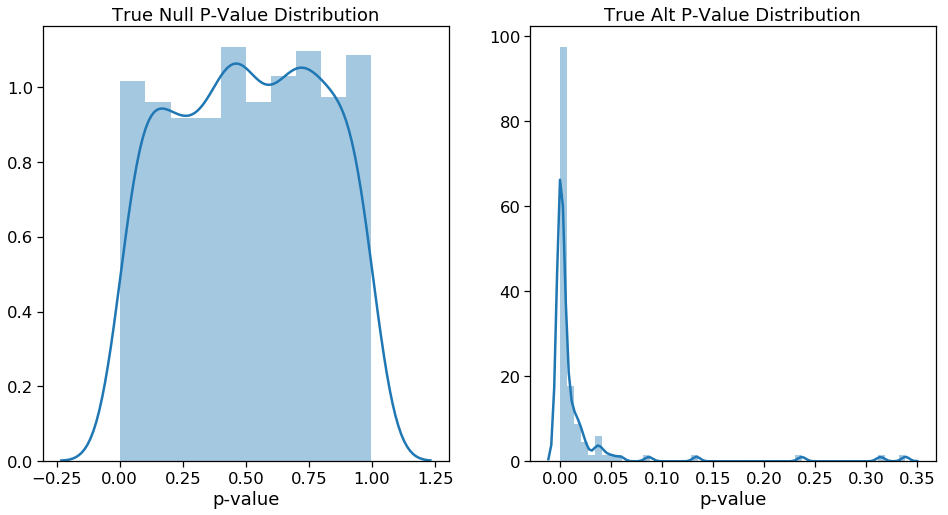

In [10]:
# take a look at the p-value distributions
plt_dims = (16, 8)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=plt_dims)

plt.subplot(1,2,1)
sns.distplot(true_null_p)
plt.title('True Null P-Value Distribution')
plt.xlabel('p-value');

plt.subplot(1,2,2)
sns.distplot(true_alt_p)
plt.title("True Alt P-Value Distribution")
plt.xlabel('p-value');


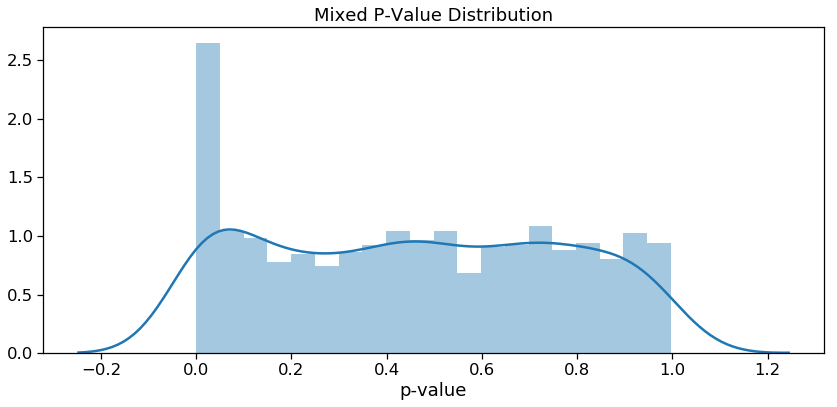

In [14]:
# combine these together and replot
plt_dims = (14, 6)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=plt_dims)
sns.distplot(mix_p, bins=20)
plt.title('Mixed P-Value Distribution')
plt.xlabel('p-value');

## Determine Sample Type I and Type II error rates

In [15]:
# examine the null group
print('P-values above 0.05 in Null Group: ', sum(true_null_p > 0.05))
print('P-values below 0.05 in Null Group: ', len(true_null_p) - sum(true_null_p > 0.05))
print('False Positive Rate: ', round((len(true_null_p) - sum(true_null_p > 0.05)) / len(true_null_p), 3))

P-values above 0.05 in Null Group:  860
P-values below 0.05 in Null Group:  40
False Positive Rate:  0.044


In [16]:
# examine the alternative group 
print('P-values above 0.05 in Alt Group: ', sum(true_alt_p > 0.05))
print('P-values below 0.05 in Alt Group: ', len(true_alt_p) - sum(true_alt_p > 0.05))
print('False Negative Rate: ', round((sum(true_alt_p > 0.05)) / len(true_alt_p), 3))

P-values above 0.05 in Alt Group:  7
P-values below 0.05 in Alt Group:  93
False Negative Rate:  0.07


## Apply BH FDR Procedure

In [17]:
# first, establish class identity indicator for tracking
df = pd.DataFrame({'p-value' : mix_p})
df['null_fl'] = np.where(df.index < 900, 1, 0)
df.head()

,p-value,null_fl
0,0.588332,1
1,0.409386,1
2,0.230565,1
3,0.803652,1
4,0.129537,1


In [18]:
print(df['null_fl'].value_counts())

1    900
0    100
Name: null_fl, dtype: int64


In [19]:
# Quality Check
print('False Positive Count: ', sum(df[df.null_fl==1]['p-value'] < 0.05))
print('False Negative Count: ', sum(df[df.null_fl==0]['p-value'] > 0.05))

False Positive Count:  40
False Negative Count:  7


### Step One

In [20]:
# BH step one - sort values and assign index
df = df.sort_values(by='p-value', ascending=True)
#test['i'] = np.arange(1, 1001)
df.head(10)

,p-value,null_fl
911,2.857415e-10,0
985,1.126458e-07,0
926,1.446191e-07,0
918,1.565778e-07,0
975,4.036232e-07,0
935,7.316451e-07,0
949,1.178011e-06,0
968,1.264067e-06,0
988,1.324333e-06,0
928,1.518715e-06,0


### Step Two

In [88]:
m = len(mix_p)
q = 0.05
hold_list = []
for i in range(1, m+1):
    val = (i/m)*q
    hold_list.append(val)

### Step Three

In [91]:
test['p_value_adj'] = hold_list
test['reject_fl'] = np.where(test['p-value'] < test['p_value_adj'], 1,0)
test.head()

,p-value,null_fl,p_value_adj,reject_fl
911,2.857415e-10,0,0.00005,1
985,1.126458e-07,0,0.00010,1
926,1.446191e-07,0,0.00015,1
918,1.565778e-07,0,0.00020,1
975,4.036232e-07,0,0.00025,1


In [94]:
pd.crosstab(test['null_fl'], test['reject_fl'])

reject_fl,0,1
null_fl,,
0,37,63
1,899,1


False Positive Rate quite low